pourquoi mauvais commentaire  

pourquoi mauvaise livraison ?


# Preprocessing

### Import and files

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline


In [149]:
import os

for dirname, _, filenames in os.walk("."):
    for filename in filenames:
        print(os.path.join(dirname, filename))


.\.gitignore
.\filrouge.ipynb
.\.vscode\settings.json
.\data\olist_customers_dataset.csv
.\data\olist_geolocation_dataset.csv
.\data\olist_orders_dataset.csv
.\data\olist_order_items_dataset.csv
.\data\olist_order_payments_dataset.csv
.\data\olist_order_reviews_dataset.csv
.\data\olist_products_dataset.csv
.\data\olist_sellers_dataset.csv
.\data\product_category_name_translation.csv


### Open Files

In [150]:
order_s = pd.read_csv('./data/olist_orders_dataset.csv')
customer_s = pd.read_csv('./data/olist_customers_dataset.csv')
payment = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_item = pd.read_csv('./data/olist_order_items_dataset.csv')
product = pd.read_csv('./data/olist_products_dataset.csv')
reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
category = pd.read_csv('./data/product_category_name_translation.csv')
cat_name_translation = pd.read_csv(
    './data/product_category_name_translation.csv')


In [151]:
print(
    'orders data shape:',
    order_s.shape,
    '\ncustomer data shape:',
    customer_s.shape,
    '\npayment data shape:',
    payment.shape,
    '\norder_item data shape:',
    order_item.shape,
    '\nproduct data shape:',
    product.shape,
    '\nreview data shape:',
    reviews.shape,
    '\nlanguage data shape:',
    cat_name_translation.shape,
)


orders data shape: (99441, 8) 
customer data shape: (99441, 5) 
payment data shape: (103886, 5) 
order_item data shape: (112650, 7) 
product data shape: (32951, 9) 
review data shape: (99224, 7) 
language data shape: (71, 2)


In [152]:
order_s.head(15)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [153]:
reviews.head(15)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


### Convert DateTime & Merge Table

In [154]:
reviews['review_creation_date'] = pd.to_datetime(
    reviews['review_creation_date'], format='%Y/%m/%d %H:%M:%S')
reviews['review_answer_timestamp'] = pd.to_datetime(
    reviews['review_answer_timestamp'], format='%Y/%m/%d %H:%M:%S')
order_s['order_purchase_timestamp'] = pd.to_datetime(
    order_s['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
order_s['order_delivered_customer_date'] = pd.to_datetime(
    order_s['order_delivered_customer_date'], format='%Y/%m/%d %H:%M:%S')


In [155]:
reviews = pd.merge(reviews, order_s, on='order_id')


In [156]:
to_drop = [
    'review_id', 'order_id', 'customer_id', 'review_comment_title',
    'order_approved_at', 'order_delivered_carrier_date',
    'order_estimated_delivery_date'
]
reviews.drop(columns=to_drop, inplace=True)
reviews


,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_delivered_customer_date
0,4,NaN,2018-01-18,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-17 18:42:41
1,5,NaN,2018-03-10,2018-03-11 03:05:13,delivered,2018-02-28 12:25:19,2018-03-09 23:17:20
2,5,NaN,2018-02-17,2018-02-18 14:36:24,delivered,2018-02-03 09:56:22,2018-02-16 17:28:48
3,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,delivered,2017-04-09 17:41:13,2017-04-20 09:08:35
4,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,delivered,2018-02-10 10:59:03,2018-02-28 16:33:35
...,...,...,...,...,...,...,...
99219,5,NaN,2018-07-07,2018-07-14 17:18:30,delivered,2018-06-27 17:31:29,2018-07-06 13:22:37
99220,5,NaN,2017-12-09,2017-12-11 20:06:42,delivered,2017-12-03 21:45:23,2017-12-08 17:19:00
99221,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,delivered,2018-03-18 09:52:19,2018-03-21 17:44:08
99222,4,NaN,2018-07-01,2018-07-02 12:59:13,delivered,2018-06-22 16:47:28,2018-06-30 12:57:51


In [157]:
reviews_na = reviews.where(reviews.isna() == False).dropna()
reviews_na.head(15)

,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_delivered_customer_date
3,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,delivered,2017-04-09 17:41:13,2017-04-20 09:08:35
4,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,delivered,2018-02-10 10:59:03,2018-02-28 16:33:35
9,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,delivered,2018-05-14 10:29:02,2018-05-21 17:52:12
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,delivered,2018-02-12 16:07:34,2018-02-15 19:16:54
15,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,delivered,2018-05-18 18:20:45,2018-05-22 14:58:47
16,2,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18,2018-01-20 21:25:45,delivered,2017-12-19 13:14:37,2018-02-21 01:25:41
22,5,Loja nota 10,2018-07-10,2018-07-11 14:10:25,delivered,2018-07-04 20:34:57,2018-07-09 20:27:50
24,5,obrigado pela atençao amim dispensada,2017-12-01,2017-12-09 22:58:58,delivered,2017-11-21 08:52:33,2017-12-01 00:33:58
27,5,A compra foi realizada facilmente.\r\nA entreg...,2018-03-23,2018-04-01 00:27:51,delivered,2018-03-18 21:01:32,2018-03-23 00:32:34
28,5,relógio muito bonito e barato.,2018-03-29,2018-04-02 14:19:31,delivered,2018-03-10 00:42:20,2018-03-28 18:13:06


### Average & Percentage

In [158]:
ps_5 = len(reviews[reviews['review_score'] == 5]) * 100 / len(reviews)
ps_1 = len(reviews[reviews['review_score'] == 1]) * 100 / len(reviews)
avg_s = reviews['review_score'].mean()

print(
    f'Total number of reviews: {len(reviews)}',
    '\nPercentage of 5 star reviews: {:.2f}%'.format(ps_5),
    '\nPercentage of 1 star reviews: {:.2f}%'.format(ps_1),
    '\nAverage review score: {:.2f}'.format(avg_s),
)


Total number of reviews: 99224 
Percentage of 5 star reviews: 57.78% 
Percentage of 1 star reviews: 11.51% 
Average review score: 4.09


In [159]:
ps_5 = len(reviews_na[reviews_na['review_score'] == 5]) * 100 / len(reviews_na)
ps_1 = len(reviews_na[reviews_na['review_score'] == 1]) * 100 / len(reviews_na)
avg_s = reviews_na['review_score'].mean()

print(
    f'Total number of reviews: {len(reviews_na)}',
    '\nPercentage of 5 star reviews: {:.2f}%'.format(ps_5),
    '\nPercentage of 1 star reviews: {:.2f}%'.format(ps_1),
    '\nAverage review score: {:.2f}'.format(avg_s),
)

Total number of reviews: 39100 
Percentage of 5 star reviews: 52.29% 
Percentage of 1 star reviews: 18.65% 
Average review score: 3.77


### Play with Seaborn

In [160]:
sns.set()

COLOR_5S = '#0571b0'
COLOR_1S = '#ca0020'
REVIEWS_PALETTE = sns.color_palette(
    (COLOR_1S, '#d57b6f', '#c6c6c6', '#7f9abc', COLOR_5S))

sns.set_style('darkgrid', {'axes.facecolor': '#eeeeee'})

resize_plot = lambda: plt.gcf().set_size_inches(20, 5)

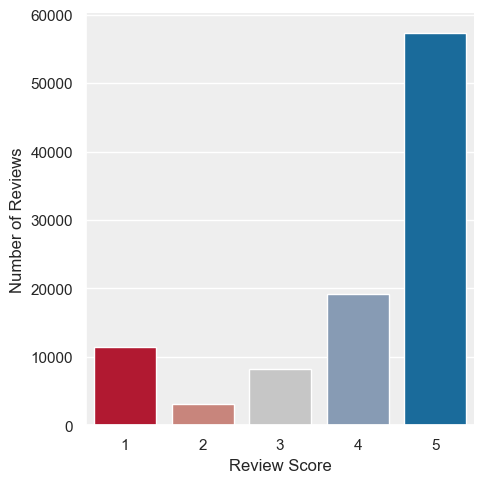

In [161]:
sns.catplot(x='review_score',
            kind='count',
            data=reviews,
            palette=REVIEWS_PALETTE).set(
                xlabel='Review Score',
                ylabel='Number of Reviews',
            )


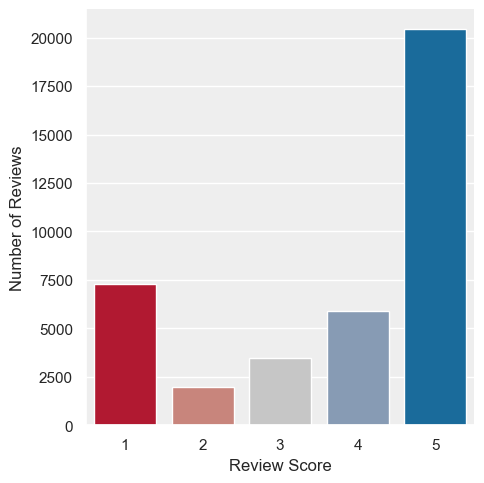

In [162]:
sns.catplot(x='review_score',
            kind='count',
            data=reviews_na,
            palette=REVIEWS_PALETTE).set(
                xlabel='Review Score',
                ylabel='Number of Reviews',
            )


[Text(0.5, 0, 'Order Purchase Timestamp'),
 Text(0, 0.5, 'Review Creation Delay'),
 (17059.511550925927, 17808.25038773148)]

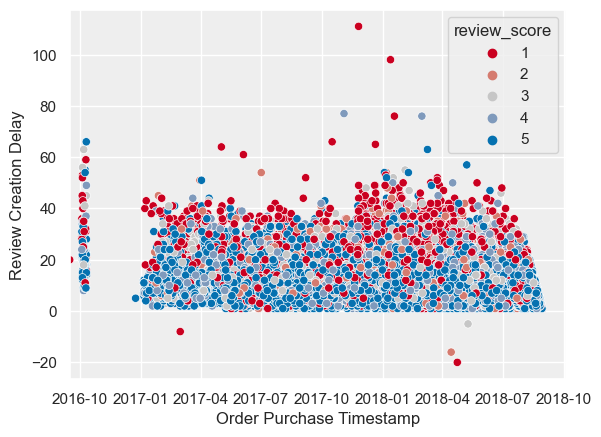

In [163]:
reviews_na['review_creation_delay'] = (
    reviews_na['review_creation_date'] -
    reviews_na['order_purchase_timestamp']).dt.days

sns.scatterplot(x='order_purchase_timestamp',
                y=reviews_na['review_creation_delay'],
                hue='review_score',
                data=reviews,
                palette=REVIEWS_PALETTE).set(
                    xlabel='Order Purchase Timestamp',
                    ylabel='Review Creation Delay',
                    xlim=(reviews_na['order_purchase_timestamp'].min()))


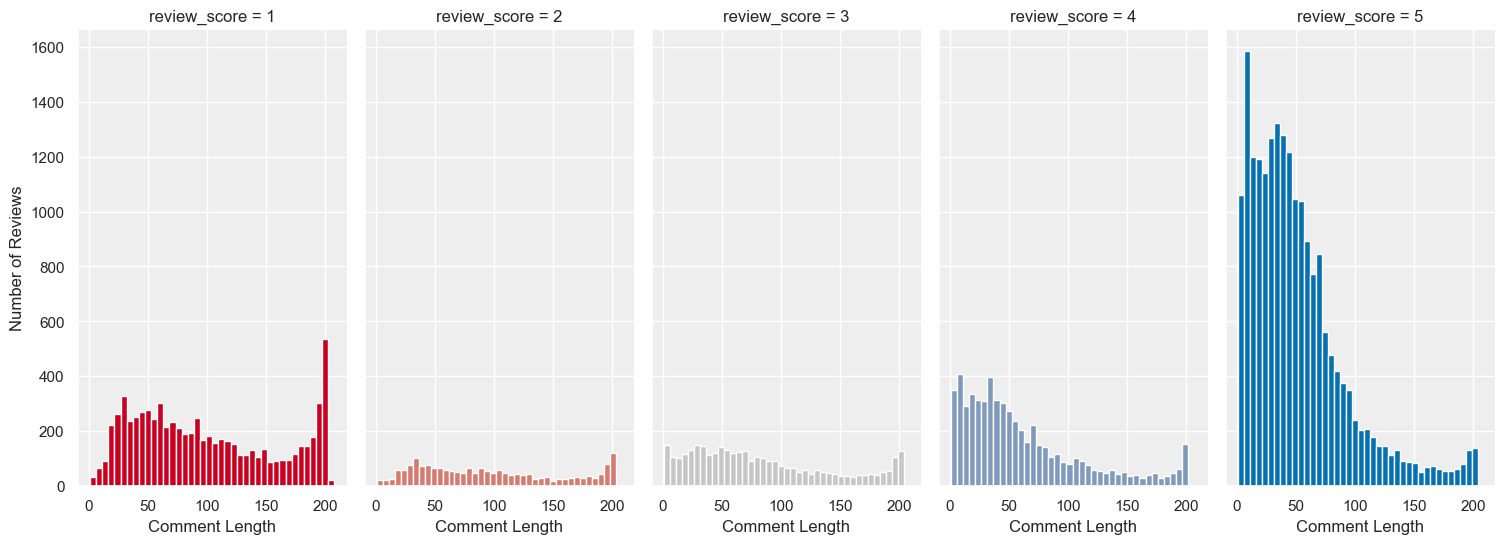

In [164]:
reviews_na['review_length'] = reviews_na['review_comment_message'].str.len()

g = sns.FacetGrid(data=reviews_na,
                  col='review_score',
                  hue='review_score',
                  palette=REVIEWS_PALETTE)
g.map(plt.hist, 'review_length', bins=40)
g.set_xlabels('Comment Length')
g.set_ylabels('Number of Reviews')
plt.gcf().set_size_inches(15, 7)

### Tokenization

In [165]:
reviews_na['review_comment_message'] = reviews_na['review_comment_message'].str.lower()
reviews_na.head(10)


,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_delivered_customer_date,review_creation_delay,review_length
3,5,recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,delivered,2017-04-09 17:41:13,2017-04-20 09:08:35,11,37
4,5,parabéns lojas lannister adorei comprar pela i...,2018-03-01,2018-03-02 10:26:53,delivered,2018-02-10 10:59:03,2018-02-28 16:33:35,18,100
9,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,delivered,2018-05-14 10:29:02,2018-05-21 17:52:12,7,174
12,4,"mas um pouco ,travando...pelo valor ta boa.\r\n",2018-02-16,2018-02-20 10:52:22,delivered,2018-02-12 16:07:34,2018-02-15 19:16:54,3,45
15,5,"vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,delivered,2018-05-18 18:20:45,2018-05-22 14:58:47,4,56
16,2,"gostaria de saber o que houve, sempre recebi e...",2018-01-18,2018-01-20 21:25:45,delivered,2017-12-19 13:14:37,2018-02-21 01:25:41,29,78
22,5,loja nota 10,2018-07-10,2018-07-11 14:10:25,delivered,2018-07-04 20:34:57,2018-07-09 20:27:50,5,12
24,5,obrigado pela atençao amim dispensada,2017-12-01,2017-12-09 22:58:58,delivered,2017-11-21 08:52:33,2017-12-01 00:33:58,9,37
27,5,a compra foi realizada facilmente.\r\na entreg...,2018-03-23,2018-04-01 00:27:51,delivered,2018-03-18 21:01:32,2018-03-23 00:32:34,4,153
28,5,relógio muito bonito e barato.,2018-03-29,2018-04-02 14:19:31,delivered,2018-03-10 00:42:20,2018-03-28 18:13:06,18,30


In [166]:
reviews_na['review_comment_message'].shape


(39100,)

In [167]:
avg = sum([len(rv.split()) for rv in reviews_na['review_comment_message']]) / len(reviews_na['review_comment_message'])
avg

11.445217391304348

In [168]:
reviews_na['review_comment_message'][3:4]

12    mas um pouco ,travando...pelo valor ta boa.\r\n
Name: review_comment_message, dtype: object

In [169]:
# with python librairies

for rv in reviews_na['review_comment_message']:
    tk_py = rv.split()
    
print(tk_py[:20])

['meu', 'produto', 'chegou', 'e', 'ja', 'tenho', 'que', 'devolver,', 'pois', 'está', 'com', 'defeito', ',', 'não', 'segurar', 'carga']


In [170]:
# with regex

import re

for rv in reviews_na['review_comment_message']:
    tk_rgx = re.findall('[\w]+', rv)

print(tk_rgx[:20])


['meu', 'produto', 'chegou', 'e', 'ja', 'tenho', 'que', 'devolver', 'pois', 'está', 'com', 'defeito', 'não', 'segurar', 'carga']
